In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy as scipy
import seaborn as sns
import decimal
import glob as glob
from scipy.stats import norm
sns.set(color_codes=True)

In [2]:
os.chdir('/Users/alex/dna/chemshell/1bna_3_aug/opt')
h2kcal = 627.509
jmol2kcal = 0.000239006
R = 8.3145 #J /K*mol

In [3]:
def round_scientific(x):
    y = []
    for i in x:
        y.append('%.3E' % decimal.Decimal(i))
    return y

In [10]:
def pick_set(x,exclude):
    # Scans list x, returns a list with strings in pick
    check = [i for i in x if any([e for e in exclude if e in i])]
    return check


# Include this list, add 'rep11' when possible
dpt = ['rep_121']

In [11]:
raw_elec_txt = sorted(glob.glob('./*_e.txt'))

raw_e_reac = pick_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), dpt)
raw_e_ts1  = pick_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), dpt)
raw_e_prod = pick_set((pd.read_csv(raw_elec_txt[4], header=None)[0]), dpt)

In [12]:
def crunch_elec(x):
    e_list = []
    for i in np.arange(len(x)):
        e_list.append(float(x[i][-17:]))
    e_list = np.array(e_list)    
    return e_list

In [13]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_prod = crunch_elec(raw_e_prod)

In [14]:
e_reac = (h_e_reac - h_e_reac)*h2kcal
e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
e_prod = (h_e_prod - h_e_reac)*h2kcal

In [15]:
d_hartree_e = { 'Reactant':h_e_reac, 'TS1':h_e_ts1, 'Product':h_e_prod}

print(pd.DataFrame(data=d_hartree_e).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    Reactant &         TS1 &   Product \\
\midrule
0 & -980.171642 & -980.154563 & -980.1574 \\
\bottomrule
\end{tabular}



In [16]:
raw_gibbs_f1 = sorted(glob.glob('./rep_121/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('./rep_121/rate/k1r/free_energy_barrier'))

raw_gibbs_f1 = pick_set(raw_gibbs_f1, dpt)
raw_gibbs_r1 = pick_set(raw_gibbs_r1, dpt)

In [17]:
raw_arrhenius_f1 = sorted(glob.glob('./rep_121/rate/k1f/arrhenius'))
raw_arrhenius_r1 = sorted(glob.glob('./rep_121/rate/k1r/arrhenius'))

raw_arrhenius_f1 = pick_set(raw_arrhenius_f1, dpt)
raw_arrhenius_r1 = pick_set(raw_arrhenius_r1, dpt)

In [18]:
def crunch_gibbs(x):
    final_list = []
    for i in np.arange(len(x)):
        df = pd.read_csv(x[i], skiprows=1, header=None, delim_whitespace=True)
        df[2] = df[1]*h2kcal
        df.columns = ['Temp', 'H', 'kcal']
        kcal = float(df['kcal'])
        final_list.append(kcal)
    final_list = np.array(final_list)      
    return final_list

In [19]:
gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)

In [20]:
gibbs_f1

array([7.55936285])

In [25]:
gibbs_f1[0] - gibbs_r1[0]

8.26824730105666

In [26]:
gibbs_ts1  = gibbs_f1
gibbs_prod  = gibbs_ts1 - gibbs_r1

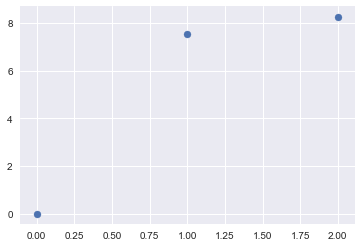

In [27]:
plt.scatter(x=[0,1,2], y=[0, gibbs_ts1.mean(), gibbs_prod.mean()])

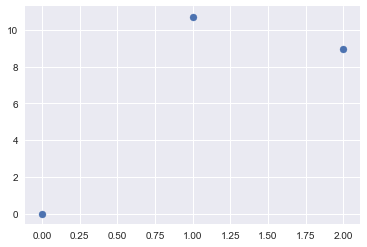

In [28]:
plt.scatter(x=[0,1,2], y=[0, e_ts1.mean(), e_prod.mean()])

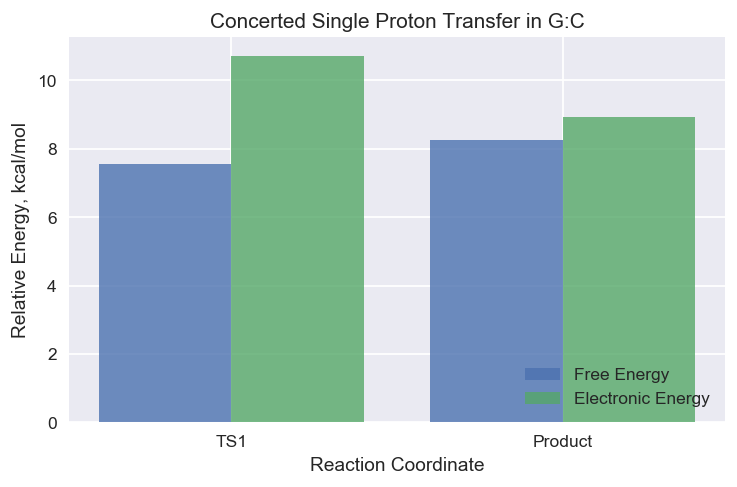

In [29]:
rxn_coord1 = ['TS1', 'Product']

y_pos = [ gibbs_ts1.mean(), gibbs_prod.mean()]
#error = [ gibbs_ts1.std(), gibbs_prod.std()]

y_pos_e = [ e_ts1.mean(), e_prod.mean()]
#error_e = [ e_ts1.std(), e_prod.std()]

x_pos = np.arange(len(rxn_coord1))

fig, ax = plt.subplots(dpi=125)

ax.bar(x_pos, y_pos, align='center', alpha=0.8, ecolor='black', capsize=10, width=0.4, label='Free Energy')
ax.bar(x_pos+0.4, y_pos_e, align='center', alpha=0.8, ecolor='black', capsize=10, width=0.4, label='Electronic Energy')

ax.set_xticks(x_pos+0.2)
ax.set_xticklabels(rxn_coord1)
ax.set_xlabel('Reaction Coordinate')

ax.set_title('Concerted Single Proton Transfer in G:C')
ax.set_ylabel('Relative Energy, kcal/mol')

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [30]:
def crunch_rate(x):
    final_list = []
    for i in np.arange(len(x)):
        df = pd.read_csv(x[i], header=None, delim_whitespace=True, skiprows=2)
        df = np.float((df[1])[1])
        final_list.append(df)
    final_list=np.array(final_list)    
    return final_list

In [31]:
rate_f1 = crunch_rate(raw_arrhenius_f1)
rate_r1 = crunch_rate(raw_arrhenius_r1)

In [32]:
f1_s = 10**np.array(rate_f1)
r1_s = 10**np.array(rate_r1)

t_gc_s = 1/f1_s
t_gct_s = 1/r1_s

In [33]:
d_kinetics = { 'k1f':f1_s, 'k1r':r1_s, 'keq':f1_s/r1_s, 'gc_t':t_gc_s, 'gc_taut_t':t_gct_s }

df_kinetics = pd.DataFrame(data=d_kinetics)
df_kinetics

,k1f,k1r,keq,gc_t,gc_taut_t
0,1.398126e+08,1.475152e+14,9.477841e-07,7.152433e-09,6.778963e-15


In [25]:
def print_results(x, y=str):
    return format(x[y].mean(), "10.2E"), format(x[y].std(),"10.2E"), round(x[y].std()/x[y].mean()*100, 1)

In [26]:
print_results(df_kinetics, 'k1f')

('       NAN', '       NAN', nan)

In [27]:
print_results(df_kinetics, 'k1r')

('       NAN', '       NAN', nan)

In [28]:
print_results(df_kinetics, 'keq')

('       NAN', '       NAN', nan)

In [29]:
print_results(df_kinetics, 'gc_t')

('       NAN', '       NAN', nan)

In [64]:
print_results(df_kinetics, 'gc_taut_t')

('  6.78E-15', '       NAN', nan)

In [65]:
d_thermo = { 'ts1':gibbs_ts1, 'prod':gibbs_prod }
df_thermo = pd.DataFrame(data=d_thermo)
df_thermo

,ts1,prod
0,7.559363,8.268247
